A notebook to update the mirror throughputs, starting with the source in Docushare, Document-33018, and displaying exactly what is used and how.
* Bo Xin updated 25 June 2019 (data provided by Chuck Claver and Sandrine Thomas)

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# this magic command makes plots appear within the notebook
%matplotlib inline

# Import bandpassUtils, without requiring or using LSST stack -- in order to get the defaultDirectory layout.
currentdir = os.getcwd()
syseng_python = os.path.normpath(os.path.join(currentdir, '../python/lsst/syseng/throughputs'))
if syseng_python not in sys.path:
    sys.path.append(syseng_python)
from bandpassUtils import setDefaultDirs

In [2]:
defaultDirs = setDefaultDirs(rootDir = os.path.normpath(os.path.join(currentdir, '..')))
for k, v in defaultDirs.items():
    print(k, v)

detector /Users/bxin/lsst_stack/syseng_throughputs/components/camera/detector/joint_minimum
lens1 /Users/bxin/lsst_stack/syseng_throughputs/components/camera/lens1
lens2 /Users/bxin/lsst_stack/syseng_throughputs/components/camera/lens2
lens3 /Users/bxin/lsst_stack/syseng_throughputs/components/camera/lens3
filters /Users/bxin/lsst_stack/syseng_throughputs/components/camera/filters
mirror1 /Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror1
mirror2 /Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror2
mirror3 /Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror3
atmosphere /Users/bxin/lsst_stack/syseng_throughputs/siteProperties


In [3]:
docusharefile = 'Document-33018.xlsx'
xl = pd.ExcelFile(docusharefile)
df1 = xl.parse('Lsst_VA_1605_protected Aluminum', skiprows=3)
idx = ~np.isnan(df1['Mean'])
df1 = df1[idx]
df2 = xl.parse('Lsst_VA_1605_protected Silver', skiprows=3)
idx = ~np.isnan(df2['Mean'])
df2 = df2[idx]
df2[:5]

,Wavelength (nm),%R,%R.1,%R.2,%R.3,%R.4,%R.5,%R.6,%R.7,%R.8,%R.9,Unnamed: 11,Mean,STDEV,Min,Max
0,1500,96.447,98.456,98.477,98.512,98.508,98.472,98.519,98.447,98.525,98.298,NaN,98.468222,0.069792,98.298,98.525
1,1499,96.464,98.470,98.487,98.516,98.523,98.481,98.531,98.444,98.541,98.309,NaN,98.478000,0.070815,98.309,98.541
2,1498,96.5,98.452,98.466,98.505,98.510,98.472,98.523,98.440,98.518,98.301,NaN,98.465222,0.068500,98.301,98.523
3,1497,96.522,98.431,98.450,98.486,98.500,98.451,98.494,98.415,98.492,98.280,NaN,98.444333,0.068642,98.280,98.500
4,1496,96.471,98.465,98.505,98.524,98.529,98.483,98.541,98.443,98.534,98.323,NaN,98.483000,0.068711,98.323,98.541


In [4]:
# we want wavelength in ascending order
na1 = np.array(df1, dtype=np.float64)
na2 = np.array(df2, dtype=np.float64)
idx = np.argsort(na1[:,0])
na1 = na1[idx,:]
idx = np.argsort(na2[:,0])
na2 = na2[idx,:]

In [5]:
df1.keys()

Index(['Wavelength (nm)', '%R', '%R.1', '%R.2', '%R.3', '%R.4', '%R.5', '%R.6',
       '%R.7', '%R.8', '%R.9', 'Unnamed: 11', 'Mean', 'STDEV', 'Min', 'Max'],
      dtype='object')

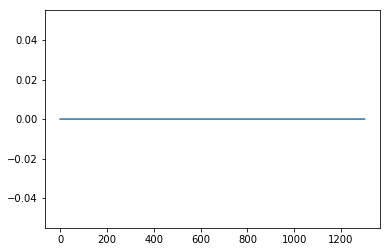

In [6]:
#check the wavelength are idential for two coatings
plt.plot(na1[:,0]-na2[:,0])

(0, 140)

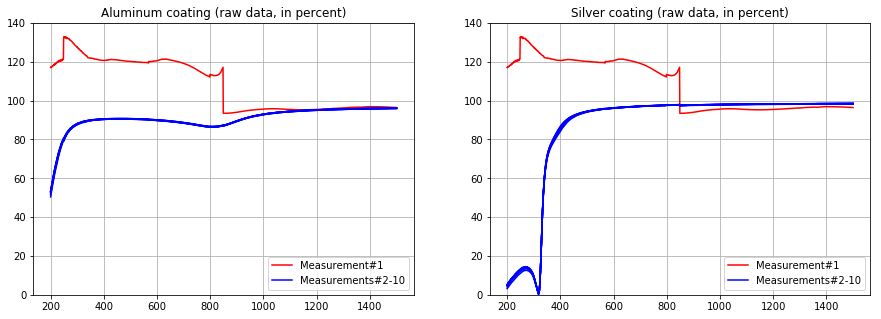

In [7]:
wl = na1[:,0]
#somehow the first measurements were bad
fig1, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].plot(wl, na1[:,1], 'r-', label='Measurement#1')
ax[0].plot(wl, na1[:,2], 'b-', label='Measurements#2-10')
ax[0].plot(wl, na1[:,3:11], 'b-')
ax[0].set_title('Aluminum coating (raw data, in percent)')
ax[0].grid()
ax[0].legend(loc='lower right')
ax[1].plot(wl, na2[:,1], 'r-', label='Measurement#1')
ax[1].plot(wl, na2[:,2], 'b-', label='Measurements#2-10')
ax[1].plot(wl, na2[:,3:11], 'b-')
ax[1].set_title('Silver coating (raw data, in percent)')
ax[1].grid()
ax[1].legend(loc='lower right')
ax[0].set_ylim([0, 140])
ax[1].set_ylim([0, 140])

(800, 880)

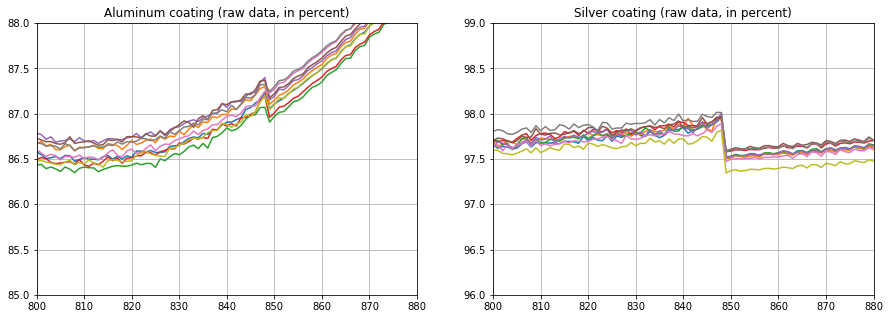

In [8]:
# there are still discontinuities around 850 nm. Questions sent to Tomi.
fig1, ax = plt.subplots(1,2, figsize=(15, 5))
#ax[0].plot(wl, na1[:,1], 'r-', label='Measurement#1')
#ax[0].plot(wl, na1[:,2], 'b-', label='Measurements#2-10')
ax[0].plot(wl, na1[:,2:11]) #, 'b-')
ax[0].set_title('Aluminum coating (raw data, in percent)')
ax[0].grid()
#ax[0].legend(loc='lower right')
#ax[1].plot(wl, na2[:,1], 'r-', label='Measurement#1')
#ax[1].plot(wl, na2[:,2], 'b-', label='Measurements#2-10')
ax[1].plot(wl, na2[:,2:11])#, 'b-')
ax[1].set_title('Silver coating (raw data, in percent)')
ax[1].grid()
#ax[1].legend(loc='lower right')
ax[0].set_ylim([85, 88])
ax[1].set_ylim([96, 99])
ax[0].set_xlim([800, 880])
ax[1].set_xlim([800, 880])

In [10]:
t1 = np.mean(na1[:,2:11], axis=1)
t2 = np.mean(na2[:,2:11], axis=1)
t1s = np.std(na1[:,2:11], axis=1)
t2s = np.std(na2[:,2:11], axis=1)

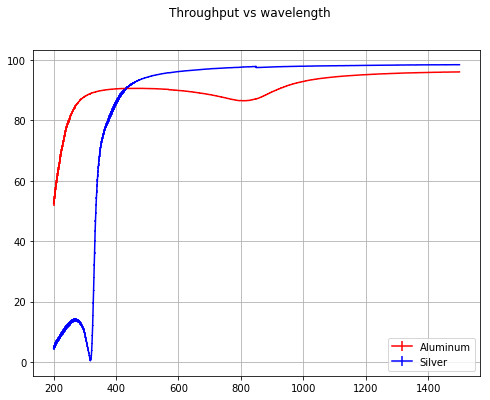

In [28]:
fig1 = plt.figure(figsize=(8, 6))
plt.errorbar(wl, t1, yerr=t1s, fmt='r-', label='Aluminum')
plt.errorbar(wl, t2, yerr=t2s, fmt='b-', label='Silver')
plt.suptitle('Throughput vs wavelength')
ax=fig1.gca()
ax.grid(True)
#ax.set_xticks(np.arange(300, 1200, 100.))
#ax.set_yticks(np.arange(0., 2., 0.01))
plt.legend(loc='lower right')
#plt.ylim(85,90)
#plt.xlim(800,880)

In [18]:
# What's in the destination directory already? 
component = 'mirror1'
contents = os.listdir(defaultDirs[component])
for c in contents:
    tmp = os.path.join(defaultDirs[component], c)
    if os.path.isdir(tmp):
        print('In directory %s:\n \t %s' % (tmp, os.listdir(tmp)))
    else:
        print(tmp)

/Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror1/m1_ProtAl_Ideal.dat
In directory /Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror1/m1_Losses:
 	 ['m1_Losses.dat']


In [19]:
component = 'mirror1'
replacement_file = os.path.join(defaultDirs[component], 'm1_ProtAl_Ideal.dat')
print('Writing to file %s' % replacement_file)

header = '#Wavelength(nm)   Throughput(0-1)'
with open(replacement_file, 'w') as f:
    print(header, file=f)
    for i in range(len(wl)):
        print(round(wl[i], 1), round(t1[i]/100, 4), file=f)

Writing to file /Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror1/m1_ProtAl_Ideal.dat


In [20]:
# What's in the destination directory already? 
component = 'mirror2'
contents = os.listdir(defaultDirs[component])
for c in contents:
    tmp = os.path.join(defaultDirs[component], c)
    if os.path.isdir(tmp):
        print('In directory %s:\n \t %s' % (tmp, os.listdir(tmp)))
    else:
        print(tmp)

In directory /Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror2/m2_Losses:
 	 ['m2_Losses.dat']
/Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror2/m2_ProtAg_Ideal.dat


In [21]:
component = 'mirror2'
replacement_file = os.path.join(defaultDirs[component], 'm2_ProtAg_Ideal.dat')
print('Writing to file %s' % replacement_file)

header = '#Wavelength(nm)   Throughput(0-1)'
with open(replacement_file, 'w') as f:
    print(header, file=f)
    for i in range(len(wl)):
        print(round(wl[i], 1), round(t2[i]/100, 4), file=f)

Writing to file /Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror2/m2_ProtAg_Ideal.dat


In [23]:
# What's in the destination directory already? 
component = 'mirror3'
contents = os.listdir(defaultDirs[component])
for c in contents:
    tmp = os.path.join(defaultDirs[component], c)
    if os.path.isdir(tmp):
        print('In directory %s:\n \t %s' % (tmp, os.listdir(tmp)))
    else:
        print(tmp)

In directory /Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror3/m3_Losses:
 	 ['m3_Losses.dat']
/Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror3/m3_ProtAl_Ideal.dat


In [24]:
component = 'mirror3'
replacement_file = os.path.join(defaultDirs[component], 'm3_ProtAl_Ideal.dat')
print('Writing to file %s' % replacement_file)

header = '#Wavelength(nm)   Throughput(0-1)'
with open(replacement_file, 'w') as f:
    print(header, file=f)
    for i in range(len(wl)):
        print(round(wl[i], 1), round(t1[i]/100, 4), file=f)

Writing to file /Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror3/m3_ProtAl_Ideal.dat


In [25]:
# Compare to prior curves, from github:master -- first clone new copy (default = master).
import shutil
import subprocess

masterdir = 'syseng_master'
# Remove previous copy of this directory, if it exists.
try:
    shutil.rmtree(masterdir)
except OSError:
    pass
gitcommand = 'git clone https://github.com/lsst-pst/syseng_throughputs.git %s' % masterdir
subprocess.run(args=gitcommand.split(), check=True)

CompletedProcess(args=['git', 'clone', 'https://github.com/lsst-pst/syseng_throughputs.git', 'syseng_master'], returncode=0)

In [26]:
masterDirs = setDefaultDirs(rootDir=masterdir)
m1_ref = pd.read_csv(os.path.join(masterDirs['mirror1'], 'm1_ProtAl_Ideal.dat'), delim_whitespace=True,
                      comment='#', header=None, names=['wavelength', 'sb'])
m2_ref = pd.read_csv(os.path.join(masterDirs['mirror2'], 'm2_ProtAg_Ideal.dat'), delim_whitespace=True,
                     comment='#', header=None, names=['wavelength', 'sb'])
m3_ref = pd.read_csv(os.path.join(masterDirs['mirror3'], 'm3_ProtAl_Ideal.dat'), delim_whitespace=True,
                      comment='#', header=None, names=['wavelength', 'sb'])

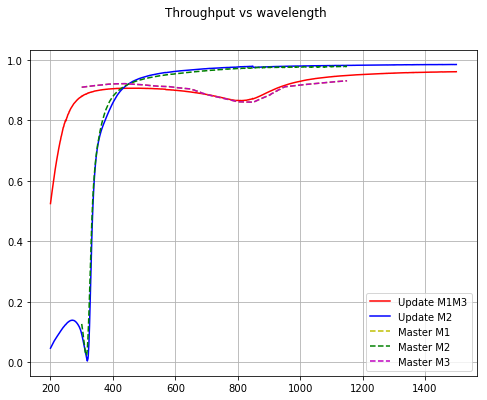

In [61]:
fig1 = plt.figure(figsize=(8, 6))
plt.plot(wl, t1/100, 'r-', label='Update M1M3')
plt.plot(wl, t2/100, 'b-', label='Update M2')
plt.plot(m1_ref['wavelength'], m1_ref['sb'], 'y--', label='Master M1')
plt.plot(m2_ref['wavelength'], m2_ref['sb'], 'g--', label='Master M2')
plt.plot(m1_ref['wavelength'], m1_ref['sb'], 'm--', label='Master M3')
plt.suptitle('Throughput vs wavelength')
ax=fig1.gca()
ax.grid(True)
#ax.set_xticks(np.arange(300, 1200, 100.))
#ax.set_yticks(np.arange(0., 2., 0.01))
plt.legend(loc='lower right')
#plt.ylim(.85,1.00)
#plt.xlim(800,880)

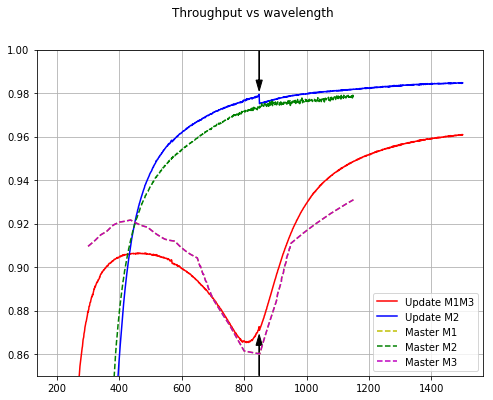

In [62]:
fig1 = plt.figure(figsize=(8, 6))
plt.plot(wl, t1/100, 'r-', label='Update M1M3')
plt.plot(wl, t2/100, 'b-', label='Update M2')
plt.plot(m1_ref['wavelength'], m1_ref['sb'], 'y--', label='Master M1')
plt.plot(m2_ref['wavelength'], m2_ref['sb'], 'g--', label='Master M2')
plt.plot(m1_ref['wavelength'], m1_ref['sb'], 'm--', label='Master M3')
plt.suptitle('Throughput vs wavelength')
ax=fig1.gca()
ax.grid(True)
#ax.set_xticks(np.arange(300, 1200, 100.))
#ax.set_yticks(np.arange(0., 2., 0.01))
plt.legend(loc='lower right')
plt.ylim(.85,1.00)
ax = plt.axes()
ax.arrow(848, .85, 0, .014, head_width=20, head_length=0.005, fc='k', ec='k')
ax.arrow(848, 1, 0, -.014, head_width=20, head_length=0.005, fc='k', ec='k')

In [63]:
# When all done - remove the git clone.
shutil.rmtree(masterdir)